In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
columns=[]
for lst in iris.feature_names:
    tmp=lst.split(' ')
#     #print(tmp)
#     str = tmp[0]+'_'+tmp[1]
#     #print(str)
#     columns.append(str)
    columns.append(tmp[0]+'_'+tmp[1])
columns #  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [5]:
#columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(iris.data, columns=columns)
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


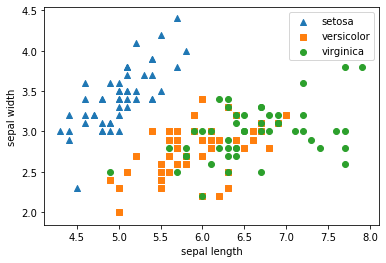

In [6]:
markers = ['^','s','o'] # setosa 0, versicolor 1 ,virginica 2
for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal_length']
    y_axis_data = df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

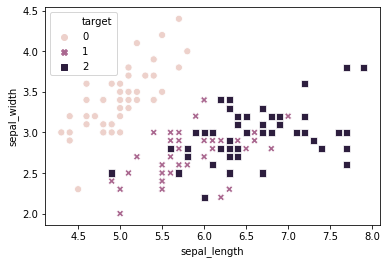

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [6, 4] # setting figure size
sns.scatterplot(x='sepal_length', 
                y='sepal_width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=50, # marker size
                data=df)
plt.show()

In [8]:
# pca적용하기 전 스케일링(pca압축하기 전 각 속성값 동일한 스케일로 변환)
from sklearn.preprocessing import StandardScaler
#df = pd.DataFrame(iris.data, columns=columns)
iris_scaled = StandardScaler().fit_transform(df)
iris_scaled.shape

(150, 5)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 4차원 => 2차원 PCA 변환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape # (150, 2 )  <=== n_components=2

(150, 2)

In [10]:
#PCA변환된 데이터 pandas 
pca_df = pd.DataFrame(iris_pca, columns=['pca_1', 'pca_2'])
pca_df['target'] = iris.target
pca_df.head()

,pca_1,pca_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


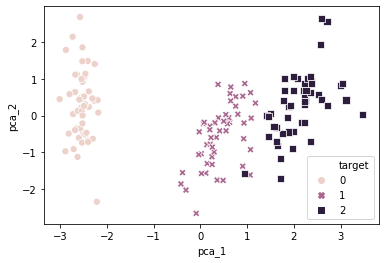

In [11]:
plt.rcParams['figure.figsize'] = [6, 4] # setting figure size #plt.figure(figsize = (14,14))
sns.scatterplot(x='pca_1', 
                y='pca_2', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=50, # marker size
                data=pca_df)
plt.show()

In [12]:
print(pca.explained_variance_ratio_)
# 변동성의 76% 18%

[0.76740358 0.18282727]


In [ ]:
## RandomForestClassifier 결과값 비교

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf=RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3) # 3번 교차 sk폴드 결과 3개 리턴
print(scores)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.98039216 0.92156863 0.97916667]


In [14]:
pca_X = pca_df[['pca_1', 'pca_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores_pca)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.96078431 1.         1.        ]


## uci credit card client data down

In [19]:

df = pd.read_excel('credit_card.xls', sheet_name='Data')
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [21]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1) # pandas 삭제시 축은  numpy 다름
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


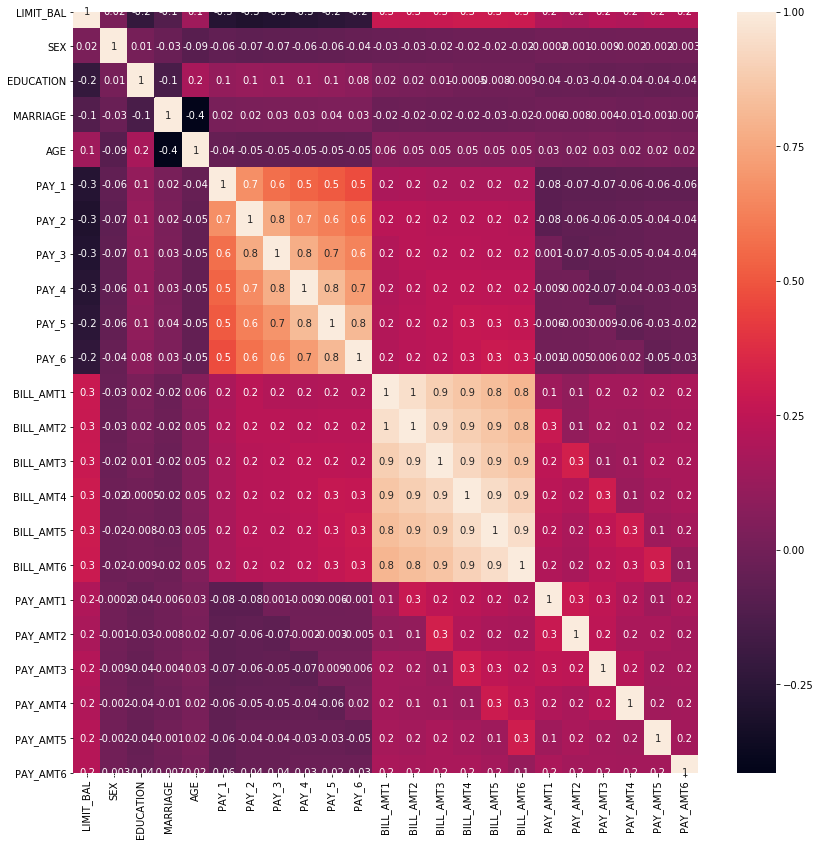

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr=X_features.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print(f'대상속성명 : {cols_bill}')

df_scaled = StandardScaler().fit_transform(X_features[cols_bill])
pca = PCA(n_components=2) # 6차원 -> 2차원
pca.fit(df_scaled)
print(f'변동성 : {pca.explained_variance_ratio_}')

대상속성명 : ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
변동성 : [0.90555253 0.0509867 ]


In [28]:
# rcf 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf=RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3) # 3번 교차 sk폴드 결과 3개 리턴
print(scores)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.7968 0.8077 0.8115]


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(X_features)
pca = PCA(n_components=6) # 23차원 -> 6차원  1/4
df_pca=pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
print(f'3폴드의 pca 변환된 개별 폴드 세트별 정확도 : {scores_pca}')

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3폴드의 pca 변환된 개별 폴드 세트별 정확도 : [0.7818 0.7875 0.7896]


In [ ]:
# pca 압축(1/4)되어도 정확도가 유지됨을 알수 있다. 컴퓨터 비젼분야에서 적용가능하다